In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("data/train2.csv")

In [5]:
df.head()

,Image_name,Patient_ID,Study,Sex,Age,ViewCategory,ViewPosition,Atelectasis,Cardiomegaly,Consolidation,...,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,00000003_001_001.jpg,3,1,Male,41.0,Frontal,AP,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,00000004_001_001.jpg,4,1,Female,20.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,00000004_001_002.jpg,4,1,Female,20.0,Lateral,Lateral,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,00000006_001_001.jpg,6,1,Female,42.0,Frontal,AP,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,00000010_001_001.jpg,10,1,Female,50.0,Frontal,PA,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [32]:
df.shape

(108494, 21)

In [36]:
df.drop_duplicates(keep='first').shape

(108494, 21)

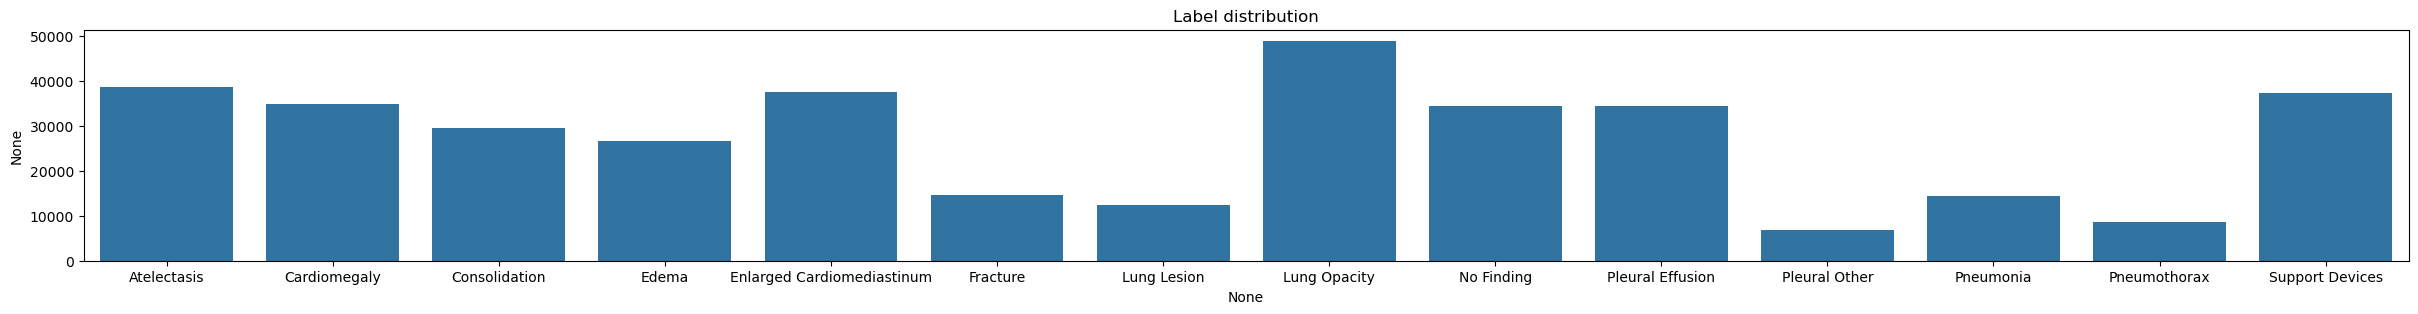

In [28]:
label_cols = df.columns[7:]

dist_disease = df[label_cols].sum()
plt.figure(figsize=(30,3))
sns.barplot(x=label_cols, y=dist_disease)
plt.title('Label distribution')
plt.show()

In [29]:
label_counts = df.groupby('Sex')[label_cols].mean()
label_counts

,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
Sex,,,,,,,,,,,,,,
Female,0.376325,0.345048,0.311456,0.271736,0.394609,0.153643,0.121449,0.494876,0.295741,0.333071,0.070210,0.141335,0.080788,0.355474
Male,0.391659,0.346048,0.311812,0.266237,0.398154,0.149842,0.131954,0.504275,0.287447,0.342911,0.073628,0.143512,0.090287,0.382724


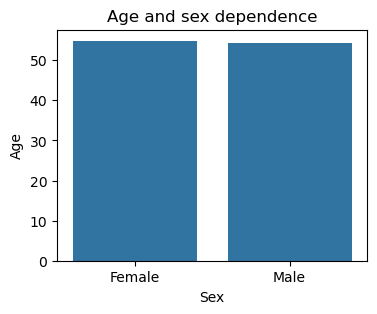

In [21]:
mean_age = df.groupby('Sex')['Age'].mean()
mean_age
plt.figure(figsize=(4,3))
sns.barplot(x=mean_age.index, y=mean_age)
plt.title("Age and sex dependence")
plt.show()

In [ ]:
corr = df.iloc[:, 1:].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Disease Co-occurrence")
plt.show()


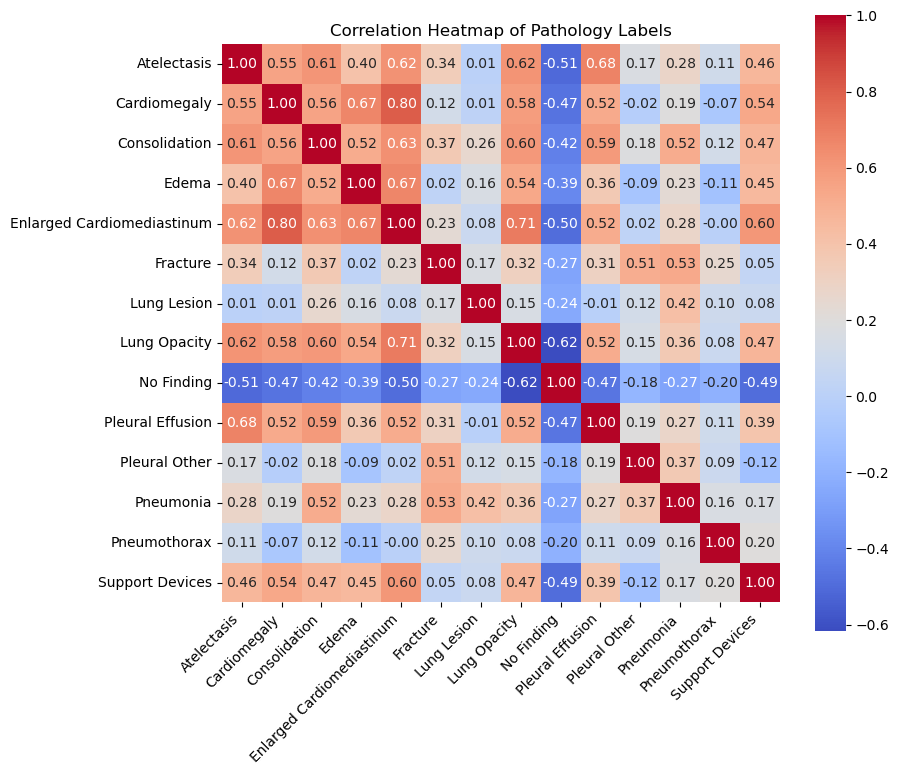

In [38]:
corr_matrix = df[label_cols].corr()

plt.figure(figsize=(9, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Pathology Labels")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()